In [17]:
import pandas as pd

data = pd.read_csv('reviews.csv')
data = data.head(30000)
data.tail(5)

,Time_submitted,Review,Rating,Total_thumbsup,Reply
29995,2022-04-23 20:03:35,"When I play music on my playstation (4 and 5),...",3,0,NaN
29996,2022-04-23 19:51:42,Absolutely brilliant Playlists,5,0,NaN
29997,2022-04-23 19:49:46,what is this behavior spotify...??? every time...,1,0,NaN
29998,2022-04-23 19:45:41,Great interface and setup...,5,0,NaN
29999,2022-04-23 19:42:41,this app is so trash. it is impossible to do a...,1,4,NaN


In [18]:
data.isnull().sum()

Time_submitted        0
Review                0
Rating                0
Total_thumbsup        0
Reply             29927
dtype: int64

C:\Users\Naufal\AppData\Local\Temp\ipykernel_17136\4234130059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=data, palette='pastel')


<Axes: xlabel='Rating', ylabel='count'>

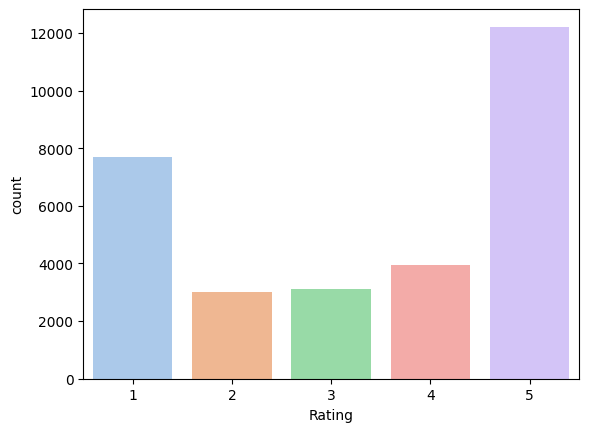

In [19]:
import seaborn as sns
sns.countplot(x='Rating', data=data, palette='pastel')

In [20]:
def transform_ratings(rating):
    if rating == 5 or rating == 4:
        return "Good"
    if rating == 3:
        return "Neutral"
    if rating == 2 or rating == 1:
        return "Bad"

C:\Users\Naufal\AppData\Local\Temp\ipykernel_17136\1551887517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Desc', data=data, palette='pastel')


,Time_submitted,Review,Rating,Total_thumbsup,Reply,Desc,length
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN,Good,112
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN,Good,86
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN,Good,106
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN,Bad,47
4,2022-07-09 13:20:49,Dear Spotify ... why do I get songs that I di...,1,1,NaN,Bad,105


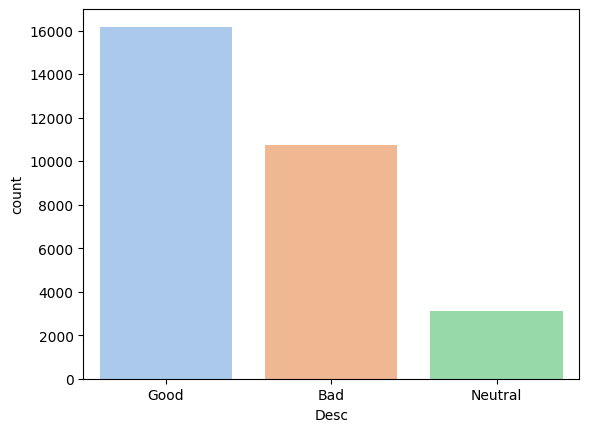

In [21]:
data['Desc'] = data['Rating'].apply(transform_ratings)#Buat kolom baru ‘Desc’ dengan mentransform Rating menjadi bentuk karakter
data['length'] = data['Review'].str.len()#Buat kolom baru ‘length’ diisi dengan jumlah kata yang ada di dalam kolom Review
sns.countplot(x='Desc', data=data, palette='pastel') 
data.head()


<Axes: xlabel='length', ylabel='Total_thumbsup'>

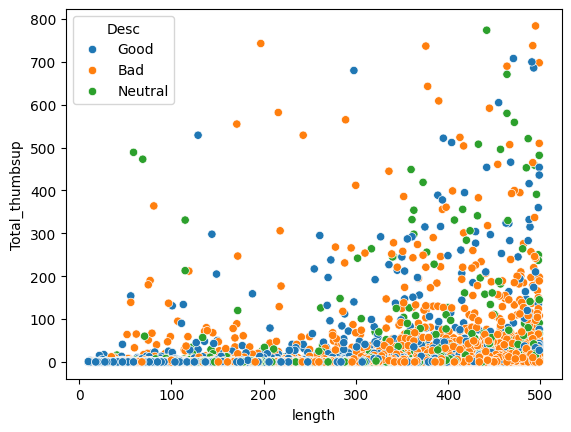

In [22]:
sns.scatterplot(x=data['length'][data.length < 500], y=data['Total_thumbsup'][data.Total_thumbsup < 800],hue=data['Desc'])

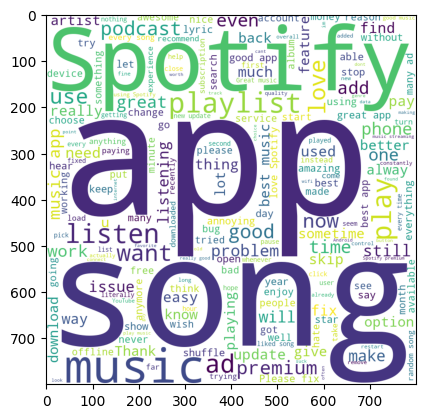

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = " ".join(data.loc[:,'Review']) #Membuat wordcloud berdasarkan semua baris pada kolom “Review”
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(reviews)
plt.imshow(wordcloud) 

In [24]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda x: " ".join(x.lower() for x in x.split())) #a
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: re.sub('[^a-z A-Z 0-9-]+', '', word))#b

stop_words = stopwords.words('english')
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words)) #c

stemmer = PorterStemmer()
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda 
word:" ".join(stemmer.stem(word) for word in word.split()))#d

data.head()["Review"] 

0    great music servic audio high qualiti app easi...
1    pleas ignor previou neg rate app super great g...
2    pop-up get best spotifi experi android 12 anno...
3                      realli buggi terribl use recent
4    dear spotifi get song didnt put playlist shuff...
Name: Review, dtype: object

In [25]:
from sklearn.model_selection import train_test_split
X = data['Review']
y = data['Desc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22500,), (7500,), (22500,), (7500,))

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_train

array([1, 1, 1, ..., 1, 1, 0])

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
cv.fit(X_train)
X_train_count = cv.transform(X_train)
X_test_count = cv.transform(X_test)
print(X_train_count)

  (0, 3238)	1
  (0, 3300)	2
  (0, 3915)	1
  (0, 5312)	1
  (0, 5667)	1
  (0, 5770)	1
  (0, 5771)	1
  (0, 8339)	1
  (0, 9393)	1
  (0, 9775)	1
  (0, 9847)	1
  (1, 795)	1
  (1, 1131)	1
  (1, 3698)	1
  (1, 4171)	1
  (1, 4487)	1
  (1, 5098)	1
  (1, 7952)	1
  (1, 11212)	1
  (2, 668)	1
  (2, 2147)	1
  (2, 3861)	1
  (2, 4517)	1
  (2, 5187)	1
  (2, 5412)	1
  :	:
  (22497, 6871)	1
  (22497, 7674)	2
  (22497, 7708)	1
  (22497, 8502)	1
  (22497, 8997)	1
  (22497, 9127)	1
  (22497, 9393)	3
  (22497, 9923)	1
  (22497, 10305)	1
  (22497, 10874)	1
  (22497, 11454)	1
  (22498, 3270)	1
  (22498, 3544)	1
  (22498, 4590)	1
  (22498, 5418)	1
  (22498, 7229)	1
  (22498, 8197)	1
  (22498, 9256)	1
  (22498, 10339)	1
  (22499, 1464)	1
  (22499, 2143)	1
  (22499, 4427)	1
  (22499, 5372)	1
  (22499, 6567)	1
  (22499, 7133)	1


In [28]:
tfidf = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(X_train_tfidf)

  (0, 303)	0.13062889925880847
  (0, 316)	0.1712225222557342
  (0, 353)	0.04249032092974382
  (0, 358)	0.07179335361775789
  (0, 424)	0.04886500078711701
  (0, 436)	0.06919343436889701
  (0, 463)	0.06919343436889701
  (0, 468)	0.08474482452286002
  (0, 482)	0.07072256753028539
  (0, 485)	0.16104137891450937
  (0, 624)	0.08419947742501467
  (0, 644)	0.04043673293102344
  (0, 649)	0.10611744645593456
  (0, 2395)	0.08888474294974069
  (0, 2396)	0.10599762705138593
  (0, 2443)	0.16572010094758846
  (0, 2448)	0.12305801650711094
  (0, 2639)	0.04611449872614155
  (0, 2657)	0.06501396441420682
  (0, 3124)	0.06251987851784717
  (0, 3138)	0.09719271966355901
  (0, 3203)	0.06227935094748998
  (0, 3204)	0.06591831490831097
  (0, 3348)	0.06667807773285328
  (0, 3363)	0.09268190306670897
  :	:
  (22499, 4603)	0.11669344726713388
  (22499, 5311)	0.10379024078694296
  (22499, 5395)	0.12304548063676565
  (22499, 5398)	0.28783509875856894
  (22499, 5680)	0.08336144730361146
  (22499, 5700)	0.2000807786

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(X_train_count, y_train)#Model mengambil data review yang sudah divektorisasi menggunakan Count Vectorizer(X) dan Desc (Y)
rf_cv = rf1.score(X_test_count, y_test)#test akurasi model
print(f'Random Forest Classifier on Count Vectors: {rf_cv}')

Random Forest Classifier on Count Vectors: 0.7758666666666667


In [30]:
rf2 = RandomForestClassifier()
rf2.fit(X_train_tfidf, y_train)
rf_tfidf = rf2.score(X_test_tfidf, y_test)
print(f'Random Forest Classifier on TF-IDF: {rf_tfidf}')

Random Forest Classifier on TF-IDF: 0.7541333333333333


In [31]:
from sklearn.naive_bayes import MultinomialNB
mnb1 = MultinomialNB()
mnb1.fit(X_train_count, y_train)
mnb_cv = mnb1.score(X_test_count, y_test)
print(f'M Naive Bayes Classifier on CV: {mnb_cv}')

M Naive Bayes Classifier on CV: 0.7758666666666667


In [32]:
mnb2 = MultinomialNB()
mnb2.fit(X_train_tfidf, y_train)
mnb_tfidf = mnb2.score(X_test_tfidf, y_test)
print(f'M Naive Bayes Classifier on TF-IDF: {mnb_tfidf}')

M Naive Bayes Classifier on TF-IDF: 0.7593333333333333


In [33]:
model = {'Model':['RF-Count', 'RF-TFIDF', 
                  'MNB-Count','MNB-TFIDF'], #Membuat dataframe baru menggunakan Dictionary
         'Score':[rf_cv, rf_tfidf, mnb_cv, mnb_tfidf]
         }
model_df = pd.DataFrame(model)
model_df

,Model,Score
0,RF-Count,0.775867
1,RF-TFIDF,0.754133
2,MNB-Count,0.775867
3,MNB-TFIDF,0.759333


<Axes: xlabel='Score', ylabel='Model'>

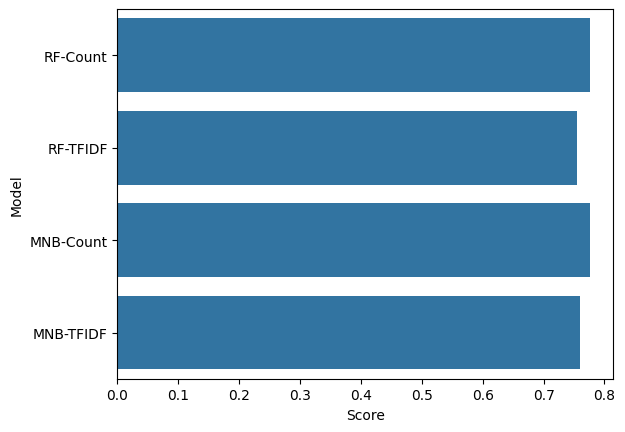

In [34]:
sns.barplot(data=model_df, y='Model', x='Score')

Text(0.5, 1.0, 'Confusion Matrix M NaiveBayes-Count')

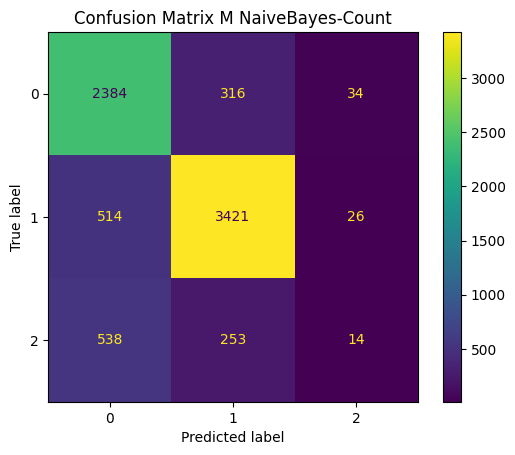

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(mnb1, 
X_test_count, y_test)
disp.ax_.set_title("Confusion Matrix M NaiveBayes-Count")

In [36]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(mnb1, f) #Naive Bayes Model with Count Vectorization
with open('transformer.pkl', 'wb') as f:
    pickle.dump(cv, f)#Count Vectorizer
with open('le.pkl', 'wb') as f:
    pickle.dump(le, f )#Label Encoder

In [37]:
test_reviews = ['This is a great app!',
                'No control options from my phones ',
                'I like the song selection, but the ads are annoying',
                'bad ui']
pred = mnb1.predict(cv.transform(test_reviews))
pred_transformed = le.inverse_transform(pred).tolist()

In [38]:
le.inverse_transform(pred).tolist() #Pastikan label 0,1,2 kita kembalikan menjadi format semula jadi “Good”, “Better”, “N

['Good', 'Bad', 'Neutral', 'Bad']

In [39]:
result = pd.DataFrame({'Reviews':test_reviews, 'Outcome': pred_transformed})
result

,Reviews,Outcome
0,This is a great app!,Good
1,No control options from my phones,Bad
2,"I like the song selection, but the ads are ann...",Neutral
3,bad ui,Bad


C:\Users\Naufal\AppData\Local\Temp\ipykernel_17136\2762034735.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=result, palette='pastel')


<Axes: xlabel='Outcome', ylabel='count'>

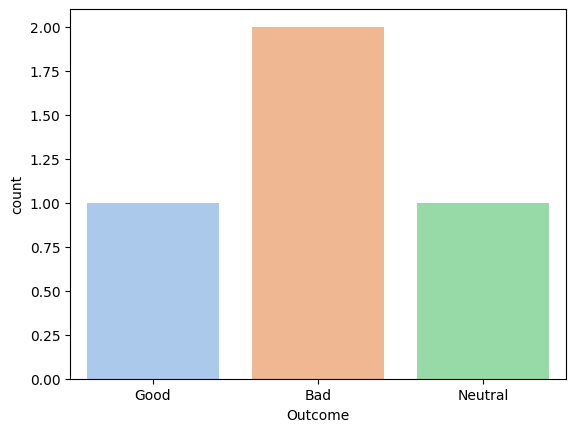

In [40]:
sns.countplot(x='Outcome', data=result, palette='pastel')